### DS Challenge LATAM Airlines

##### 0. Carga de paquetes, lectura de datos y procesamiento básico

In [2]:
#Paquetes a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Lee datos y los inserta en un df
df = pd.read_csv('dataset_SCL.csv')

C:\Users\oscar\AppData\Local\Temp\ipykernel_20240\553996775.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_SCL.csv')


In [4]:
#Revisa el encabezado del df
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [5]:
#Se revisa la estructura de los datos y los missing
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB
None


In [6]:
#Se detecta un missing en la columa 'Vlo-O'.
df[df['Vlo-O'].isna()]
#No parece ser relevante para el análisis, por lo tanto no se imputa.

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [7]:
#Se convierten columnas a formato fecha
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])

##### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

            Vlo-O             
TIPOVUELO       I            N
AÑO          2017 2018    2017
MES                           
1          2802.0  2.0  3303.0
2          2499.0  NaN  3062.0
3          2496.0  NaN  2986.0
4          2354.0  NaN  2666.0
5          2428.0  NaN  2812.0
6          2373.0  NaN  2608.0
7          2865.0  NaN  3127.0
8          2719.0  NaN  3025.0
9          2605.0  NaN  3005.0
10         2687.0  NaN  3345.0
11         2610.0  NaN  3470.0
12         2799.0  NaN  3557.0
                  Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O  Vlo-O  \
66918 2017-12-31 23:55:00   602  SCEL  KLAX   LAN 2018-01-01 00:02:00  602.0   
66947 2017-12-31 23:40:00   622  SCEL  MMMX   LAN 2018-01-01 00:12:00  622.0   

      Ori-O Des-O Emp-O  DIA  MES   AÑO DIANOM TIPOVUELO        OPERA  \
66918  SCEL  KLAX   LAN    1    1  2018  Lunes         I  Grupo LATAM   
66947  SCEL  MMMX   LAN    1    1  2018  Lunes         I  Grupo LATAM   

       SIGLAORI          SIGLADES  
66918  

[Text(0.5, 0, 'Día de la semana'), Text(0, 0.5, 'Número de vuelos')]

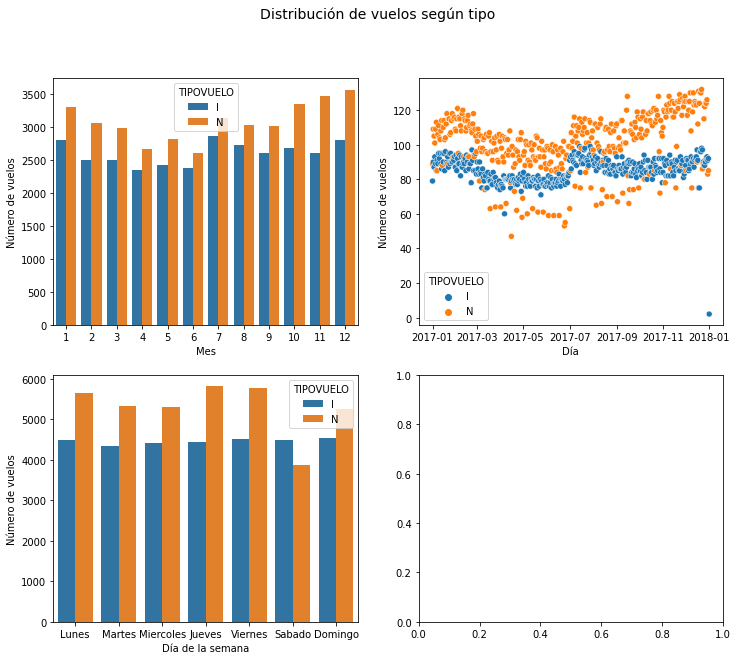

In [8]:
#Distribución de los datos según año y mes
print(pd.pivot_table(df, values = ['Vlo-O'], index = ['MES'], columns = ['TIPOVUELO','AÑO'], aggfunc = 'count'))
#Existen solamente 2 datos del año 2018 para los vuelos internacionales. Seguramente corresponden a atrasos del 2017. Se verifica esta situación:
print(df[df['AÑO']==2018])

#Grafica distribución de vuelos durante el año
#Genera variable fecha redondeando a nivel de día
df['fecha_d'] = pd.to_datetime(dict(year = df.AÑO, month = df.MES, day = df.DIA))
df['one'] = 1

df_sum_d = df[['AÑO','MES','DIA','fecha_d','Vlo-O','TIPOVUELO']].groupby(['AÑO','MES','DIA','fecha_d','TIPOVUELO'], as_index=False).count()

#Grafica distribución de vuelos en el tiempo y según tipo
fig, ax = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle('Distribución de vuelos según tipo', fontsize=14)
plt1 = sns.barplot(data=df, x='MES', y='one', hue='TIPOVUELO', estimator=sum, errorbar=None, ax = ax[0,0])
plt1.set(xlabel='Mes', ylabel='Número de vuelos')
plt2 = sns.scatterplot(data=df_sum_d, x='fecha_d', y='Vlo-O', hue='TIPOVUELO', ax = ax[0,1])
plt2.set(xlabel='Día', ylabel='Número de vuelos')
plt3 = sns.barplot(data=df, x='DIANOM', y='one', hue='TIPOVUELO', estimator=sum, order=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes',
    'Sabado', 'Domingo'], errorbar=None, ax = ax[1,0])
plt3.set(xlabel='Día de la semana', ylabel='Número de vuelos')


* El aeropuerto de origen es el mismo para todos los casos, reflejado en las variables `Ori-I`, `Ori-O` y `SIGLAORI`.
* En los vuelos nacionales e internacionales el mayor número de vuelos está asociado al período de vacaciones de invierno y verano.
* El menor tráfico de febrero de la serie mensual se explica por la menor cantidad de días que tiene el mes, donde ajustando por el menor número de días se llega a 2,661 vuelos $(2/30 \approx 6.5\% \rightarrow 2499*(1+6,5\%) = 2,661)$. Esto es evidente de igual manera en el gráfico de vuelos por día, donde los vuelos diaros de febrero son comparables a los de enero. , aunque en los vuelos internacionales se modera el tráfico en febrero.
* En los vuelos nacionales, además, se observa una alta demanda en octubre y noviembre.
* En serie diaria llama la atención la discontinuidad que se genera en julio, tanto en la serie nacional como en la internacional, con el inicio de las vacaciones de invierno.
* En la distribución por día de la semana, es notable el menor número de vuelos los días sábados en el segmento nacional, mientras que el mayor número de vuelos se observa los días viernes, sábados y lunes, que se corresponde con la semana laboral.
* Podría ser informativo hacer otras segmentaciones, según hora del día, destino norte/sur (nacionales), continental/intercontinental (internacional). Sin embargo, un excesivo detalle iría más allá del objetivo de este challenge.

##### 2. Genera las columnas adicionales y luego expórtelas en un archivo `synthetic_features.csv` :
* `temporada_alta` : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* `dif_min` : diferencia en minutos entre Fecha-O y Fecha-I .
* `atraso_15` : 1 si dif_min > 15, 0 si no.
* `periodo_dia` : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .

In [9]:
#Definimos 'temporada_alta'
df['temporada_alta'] = 0
df.loc[(df['Fecha-I'] >= '2016-12-15 00:00:00') & (df['Fecha-I'] < '2017-04-03 00:00:00'), 'temporada_alta'] = 1
df.loc[(df['Fecha-I'] >= '2017-12-15 00:00:00') & (df['Fecha-I'] < '2018-04-03 00:00:00'), 'temporada_alta'] = 1
df.loc[(df['Fecha-I'] >= '2017-07-15 00:00:00') & (df['Fecha-I'] < '2017-08-01 00:00:00'), 'temporada_alta'] = 1
df.loc[(df['Fecha-I'] >= '2017-09-11 00:00:00') & (df['Fecha-I'] < '2017-10-01 00:00:00'), 'temporada_alta'] = 1

In [10]:
#Definimos 'dif_min'
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

In [11]:
#Definimos 'atraso_15'
df['atraso_15'] = 0
df.loc[df['dif_min']>15, 'atraso_15'] = 1

In [12]:
#Definimos 'periodo_dia'
df.loc[(df['Fecha-I'].dt.hour>=5) & (df['Fecha-I'].dt.hour<12), 'periodo_dia'] = 'mañana'
df.loc[(df['Fecha-I'].dt.hour>=12) & (df['Fecha-I'].dt.hour<19), 'periodo_dia'] = 'tarde'
df.loc[df['periodo_dia'].isna(), 'periodo_dia'] = 'noche'

In [13]:
#Genera archivo synthetic_features.csv
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', index=False)

##### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

,TIPOVUELO,one,atraso_15,tasa_atraso
0,I,31240,7048,22.560819
1,N,36966,5566,15.057079


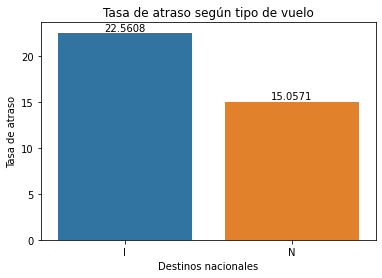

In [14]:
#Atrasos según tipo de vuelo
df_tv = df[['TIPOVUELO','one','atraso_15']].groupby(['TIPOVUELO'], as_index=False).sum()
df_tv['tasa_atraso'] = df_tv['atraso_15'] / df_tv['one'] * 100

#Gráficos de tasas de atraso, según tipo de vuelo
plt0 = sns.barplot(data=df_tv, x='TIPOVUELO', y='tasa_atraso', estimator=sum, order=['I','N'], errorbar=None)
plt0.set(title='Tasa de atraso según tipo de vuelo', xlabel='Destinos nacionales', ylabel='Tasa de atraso')
plt0.bar_label(plt0.containers[0])
df_tv

Por tipo de vuelo se observa una diferencia no menor en la tasa de atraso, donde el segmento internacional está un 49.8% por sobre el tipo nacional.

Los vuelos internacionales, a diferencia de los nacionales, están sujetos a "las libertades del aire" y otras restricciones que pudiesen imponer las autoridades aeronáuticas de los países de destino.

Dado lo anterior, para el análisis de las tasas de atraso se mantendrá la distinción de tipo de vuelo.

Tasas de atraso de principales destinos, según tipo de vuelo
   TIPOVUELO          SIGLADES   one  atraso_15  tasa_atraso
5          I      Buenos Aires  6335       1620    25.572218
18         I              Lima  5270       1214    23.036053
40         I         Sao Paulo  3569        881    24.684786
9          I  Ciudad de Panama  1850        116     6.270270
23         I           Mendoza  1625        443    27.261538

   TIPOVUELO      SIGLADES   one  atraso_15  tasa_atraso
46         N   Antofagasta  5786        847    14.638783
49         N        Calama  5146        629    12.223086
57         N  Puerto Montt  4357        734    16.846454
51         N    Concepcion  3993        623    15.602304
53         N       Iquique  3747        640    17.080331


Mayores tasas de atraso por destino, vuelos internacionales
   TIPOVUELO        SIGLADES  one  atraso_15  tasa_atraso
34         I           Quito    2          2   100.000000
10         I      Cochabamba    1          1   100.0

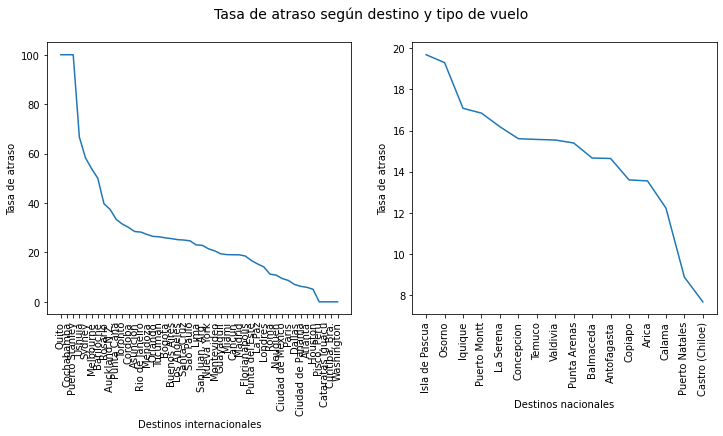

In [30]:
#Atrasos en principales destinos nacionales e internacionales
df_des = df[['TIPOVUELO','SIGLADES','one','atraso_15']].groupby(['TIPOVUELO','SIGLADES'], as_index=False).sum()
df_des['tasa_atraso'] = df_des['atraso_15'] / df_des['one'] * 100

print('Tasas de atraso de principales destinos, según tipo de vuelo')
print(df_des[df_des['TIPOVUELO']=='I'].sort_values(by=['one'], ascending=False).head(5))
print()
print(df_des[df_des['TIPOVUELO']=='N'].sort_values(by=['one'], ascending=False).head(5))
print('\n')
print('Mayores tasas de atraso por destino, vuelos internacionales')
print(df_des[df_des['TIPOVUELO']=='I'].sort_values(by=['tasa_atraso'], ascending=False).head(10))

#Gráficos de tasas de atraso, según tipo de vuelo
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Tasa de atraso según destino y tipo de vuelo', fontsize=14)
plt1 = sns.lineplot(data=df_des[df_des['TIPOVUELO']=='I'].sort_values(by=['tasa_atraso'], ascending=False), x='SIGLADES', y='tasa_atraso', ax=ax[0])
plt1.set(xlabel='Destinos internacionales', ylabel='Tasa de atraso')
plt1.tick_params(axis='x', rotation=90)
plt2 = sns.lineplot(data=df_des[df_des['TIPOVUELO']=='N'].sort_values(by=['tasa_atraso'], ascending=False), x='SIGLADES', y='tasa_atraso', ax=ax[1])
plt2.set(xlabel='Destinos nacionales', ylabel='Tasa de atraso')
plt2.tick_params(axis='x', rotation=90)


   TIPOVUELO                  OPERA    one  atraso_15  tasa_atraso
12         I            Grupo LATAM  17149       4034    23.523238
21         I            Sky Airline   2800        631    22.535714
0          I  Aerolineas Argentinas   1949        468    24.012314
9          I               Copa Air   1850        116     6.270270
7          I                Avianca   1152        306    26.562500
17         I   Latin American Wings   1038        488    47.013487
11         I              Gol Trans    806        287    35.607940

   TIPOVUELO                 OPERA    one  atraso_15  tasa_atraso
23         N           Grupo LATAM  23743       3272    13.780904
26         N           Sky Airline  11498       1909    16.602887
24         N          JetSmart SPA   1089        192    17.630854
25         N  Latin American Wings    636        193    30.345912


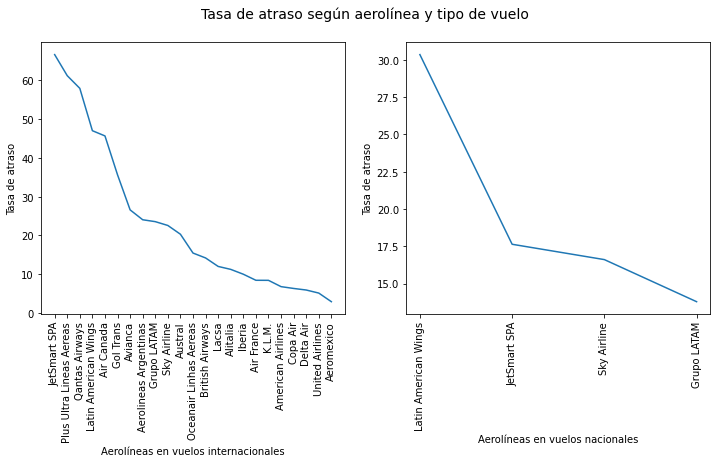

In [16]:
#Atrasos según aerolínea en vuelos nacionales e internacionales
df_aer = df[['TIPOVUELO','OPERA','one','atraso_15']].groupby(['TIPOVUELO','OPERA'], as_index=False).sum()
df_aer['tasa_atraso'] = df_aer['atraso_15'] / df_aer['one'] * 100

#Tasas de atraso de principales aerolíneas, según tipo de vuelo
print(df_aer[df_aer['TIPOVUELO']=='I'].sort_values(by=['one'], ascending=False).head(7))
print()
print(df_aer[df_aer['TIPOVUELO']=='N'].sort_values(by=['one'], ascending=False).head(7))

#Gráficos de tasas de atraso, según tipo de vuelo
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt1 = sns.lineplot(data=df_aer[df_aer['TIPOVUELO']=='I'].sort_values(by=['tasa_atraso'], ascending=False), x='OPERA', y='tasa_atraso', ax=ax[0])
plt1.set(xlabel='Aerolíneas en vuelos internacionales', ylabel='Tasa de atraso')
plt1.tick_params(axis='x', rotation=90)
fig.suptitle('Tasa de atraso según aerolínea y tipo de vuelo', fontsize=14)
plt2 = sns.lineplot(data=df_aer[df_aer['TIPOVUELO']=='N'].sort_values(by=['tasa_atraso'], ascending=False), x='OPERA', y='tasa_atraso', ax=ax[1])
plt2.set(xlabel='Aerolíneas en vuelos nacionales', ylabel='Tasa de atraso')
plt2.tick_params(axis='x', rotation=90)


[Text(0.5, 1.0, 'Tasa de atraso según mes y tipo de vuelo'),
 Text(0.5, 0, 'Mes'),
 Text(0, 0.5, 'Tasa de atraso')]

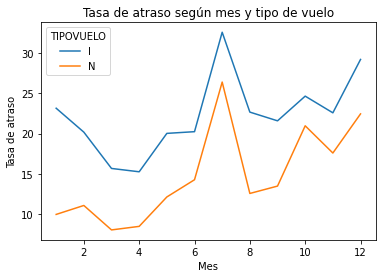

In [17]:
#Atrasos según mes del año en vuelos nacionales e internacionales
df_mes = df[['TIPOVUELO','MES','one','atraso_15']].groupby(['TIPOVUELO','MES'], as_index=False).sum()
df_mes['tasa_atraso'] = df_mes['atraso_15'] / df_mes['one'] * 100

plt1 = sns.lineplot(data=df_mes, x='MES', y='tasa_atraso', hue='TIPOVUELO')
plt1.set(title = 'Tasa de atraso según mes y tipo de vuelo', xlabel='Mes', ylabel='Tasa de atraso')

[Text(0.5, 1.0, 'Tasa de atraso según día y tipo de vuelo'),
 Text(0.5, 0, 'Día de la semana'),
 Text(0, 0.5, 'Tasa de atraso')]

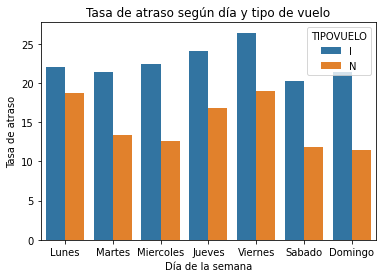

In [18]:
#Atrasos según día de la semana en vuelos nacionales e internacionales
df_dia = df[['TIPOVUELO','DIANOM','one','atraso_15']].groupby(['TIPOVUELO','DIANOM'], as_index=False).sum()
df_dia['tasa_atraso'] = df_dia['atraso_15'] / df_dia['one'] * 100
plt1 = sns.barplot(data=df_dia, x='DIANOM', y='tasa_atraso', hue='TIPOVUELO', estimator=sum, order=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])
plt1.set(title = 'Tasa de atraso según día y tipo de vuelo', xlabel='Día de la semana', ylabel='Tasa de atraso')

[Text(0, 0, '15.8709'), Text(0, 0, '13.8896')]

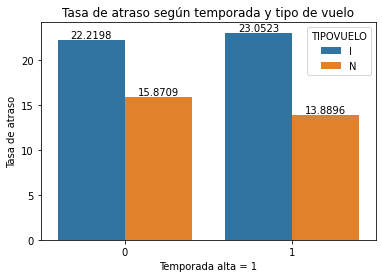

In [19]:
#Atrasos según temporada en vuelos nacionales e internacionales
df_dia = df[['TIPOVUELO','temporada_alta','one','atraso_15']].groupby(['TIPOVUELO','temporada_alta'], as_index=False).sum()
df_dia['tasa_atraso'] = df_dia['atraso_15'] / df_dia['one'] * 100
plt1 = sns.barplot(data=df_dia, x='temporada_alta', y='tasa_atraso', hue='TIPOVUELO', estimator=sum)
plt1.set(title = 'Tasa de atraso según temporada y tipo de vuelo', xlabel='Temporada alta = 1', ylabel='Tasa de atraso')
plt1.bar_label(plt1.containers[0])
plt1.bar_label(plt1.containers[1])

Sobre la composición de la tasa de atraso:

* Existe una heterogeneidad importante en la tasa de atrasos en casi todas las variables observadas.
* La tasa de atraso por destino es liderada por los destinos internacionales, aunque los 4 primeros (Quito, Cochabamba, Puerto Stanley y Ushuia [*sic*]) están asociados a un escaso número de vuelos. Los dos destinos internacionales con mayor tasa  de atrasos y un número importante de vuelos son las ciudades austrialianas Sidney y Melbourne, ambas con tasas mayores al 50%. Auckland, también en Oceanía, tiene una tasa importante de atrasos (37.4%). Tal vez sea relevante la distancia del vuelo o el continente de destino en la tasa de atraso.
* En términos mensuales, diciembre y julio son los meses que presentan la mayor tasa de atraso, tanto en los vuelos nacionales como en los internacionales.
* En relación a los días de la semana, en el segmento internacional los días viernes y jueves lideran los atrasos, mientras que los fines de semana presentan la menor tasa de atraso. A su vez, en el segmento nacional, los lunes y viernes lideran los atrasos.
* Por tipo de aerolínea, se observa un alta variabilidad en la tasa de atraso. El Grupo LATAM destaca en el segmento nacional con la menor tasa de atraso, mientras que en el segmento internacional su tasa de atraso se encuentra ligeramente por sobre el promedio (23.5>22.6).
* En el indicador de temporada alta asociada al tipo de vuelo internacional se observa el menor cambio en la tasa de atraso, el cual genera un aumento de apenas 3.7% en la tasa. En el segmento nacional, en contraste, cae la tasa de atraso en la temporada alta.

Sobre las variables que pudieran influir en la predicción de atrasos:

* Es de esperarse que las variables que presentan mayor variabilidad en relación a la tasa de atraso influyan más en la predicción.


##### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [32]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split

In [44]:
#Se generan conjuntos de prueba
y = df[['atraso_15']]
X = df[['MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLADES', 'temporada_alta', 'periodo_dia']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=129)
#Se entrenan varios modelos
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [02:36<00:00,  5.39s/it]


In [50]:
models.sort_values(by=['Balanced Accuracy', 'Accuracy'], ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.79,0.56,0.56,0.77,4.07
BaggingClassifier,0.78,0.56,0.56,0.76,1.10
ExtraTreeClassifier,0.80,0.56,0.56,0.77,0.16
DecisionTreeClassifier,0.80,0.56,0.56,0.76,0.24
ExtraTreesClassifier,0.80,0.56,0.56,0.77,4.48
KNeighborsClassifier,0.79,0.56,0.56,0.76,1.48
XGBClassifier,0.82,0.55,0.55,0.77,3.30
LGBMClassifier,0.82,0.54,0.54,0.76,0.71
NearestCentroid,0.55,0.54,0.54,0.60,0.13


In [51]:
# init setup
from pycaret.classification import *
clf1 = setup(data = X, target = y)

# compare models
best = compare_models()

ModuleNotFoundError: No module named 'pycaret'